# Recurrent Neural Networks

RNNs were introduced to better integrate Deep Learning models in the world of NLP applications, but why do we need a different type of neural network architecture for this?

Just like we are able to train algorithms to process tabular data to learn patterns and make predictions based on different features learnt from the patterns, we can train them to do the same with text data or language data. But why do we need to develop and study separate algorithms for text data? Why can't we use the exact same neural networks that we used for tabular data? The answer comes from the the difference in the nature of the data itself. Here's a slide from **Andrew Ng's** course:

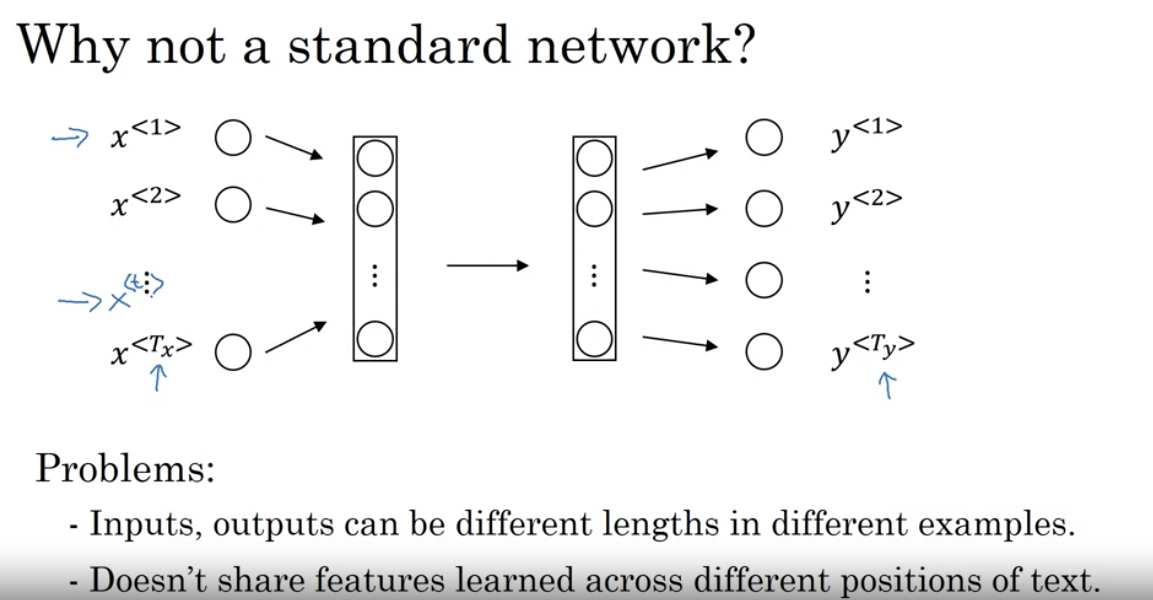

1. Each document, sentence or word, whatever the vector x represents can be of a different size. This is not the same as tabular data where the number of inputs is always fixed.
2. The algorithm needs to be aware that the positional order of the input may not always mean that it's a completely alien input and rather all patterns learnt should be application to all positions in the input space of the text data. 

#### In a nutshell, we need a better way to represent sequence of texts as the existing representations don't justify the variable length of the sequence and the commonality of knowledge across different inputs in the sequence.

## RNN Architecture

An RNN as we will learn, doesn't have either of these constraints. So since RNNs are also a type of neural network which we already have a strong foundation of, the novelty is actually the structure of the neural network that falls under this algorithm and that's what makes it. As you see more and more use-cases you'll notice that most different algorithms are just different arrangements of neurons and the layers and different arrangements of how the data passes through them.
Let's look at the RNN basic architecture:

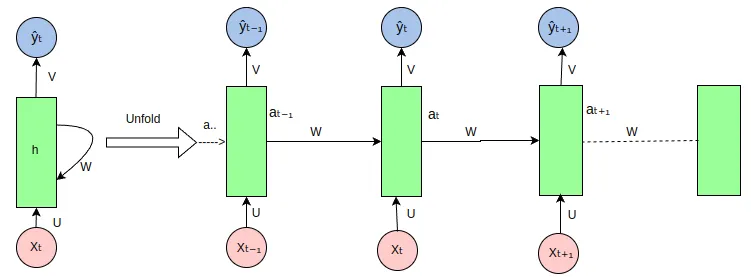

Source: https://medium.com/@poudelsushmita878/recurrent-neural-network-rnn-architecture-explained-1d69560541ef

In a single Recurrent Neural Network (RNN) cell, there are typically three key layers involved in processing the input and generating the output. Here's a breakdown of these layers:

1. **Input Layer**:
   - **Input point**: This layer receives the input data at each time step. The input \( x_t \) at time step \( t \) is fed into the network.

2. **Hidden Layer**:
   - **Hidden Neurons**: These neurons process the input along with the hidden state from the previous time step. The hidden state \( h_{t-1} \) carries information from the previous time steps and is combined with the current input \( x_t \). The hidden layer performs computations to produce a new hidden state \( h_t \).
   - **Activation Function**: A nonlinear activation function, such as \( \tanh \) or \( \text{ReLU} \), is applied to the combined input and hidden state to produce the new hidden state.

3. **Output Layer**:
   - **Output Neurons**: These neurons generate the output \( y_t \) based on the hidden state \( h_t \). The output layer may apply another set of weights and activation functions to produce the final output for each time step.

### Summary

In essence, a single RNN cell consists of:
- An **input layer** to receive the input data.
- A **hidden layer** to process the input and maintain the hidden state across time steps.
- An **output layer** to produce the output for each time step.

This structure allows RNNs to maintain and update their internal state over time, enabling them to process sequences and capture temporal dependencies.

So the RNN architecture is actually on the left and we only unfold it to explain the working on RNNs. The idea is that the current input vector is fed to the hidden layer and the output of the RNN is calculated by weighing **both hidden current layer output and the hidden layer output of the previous input vector**. This is how the RNN gives importance to the previous value in the sequence. To understand this better we should look at the calculations at each step.

# Forward Pass

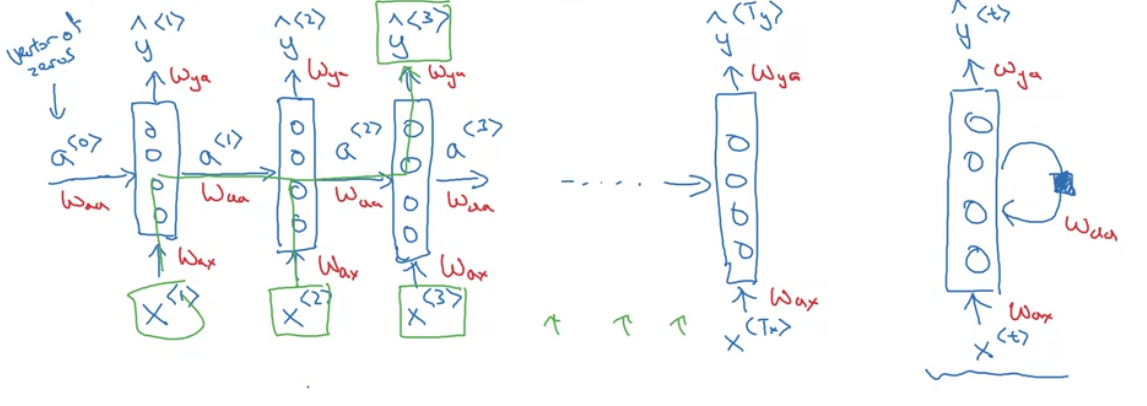

Let's take $x$ to be a sequence of input to the model. The sequence could be a sequence of words, sentences etc. Also $x$ would be the vectorized form of the input, meaning it would already have been converted to vector of numbers by the time it is input to the RNN model.
So $x[1]$ would be the first element of the sequence then $x[2]$ and so on.

Here are the equations for the calculations that are performed in a forward pass. Here for e.g. Wax means that the weight is being used to calculate some 'a' value and is being multiplied by some 'x' value.

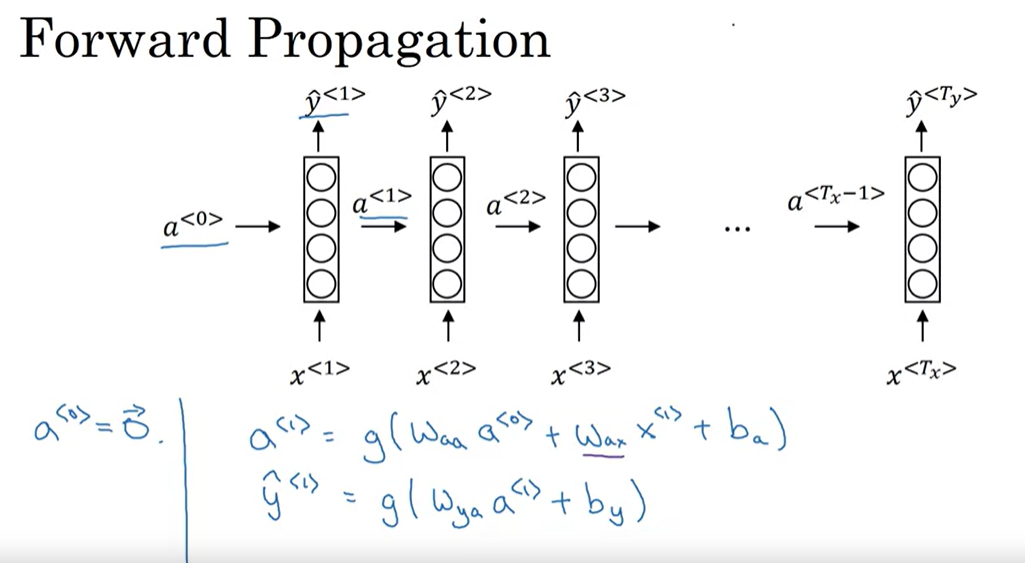

So the architecture of an RNN model is such that there is a layer of neurons that the input $x[1]$ passes through and gives us $output[1]$ through a set of mathematical transformations. Then the second input $x[2]$ passes through that same layer and follows the same process. An additional input to the layers along with $x[i]$ is the activation value from the forward propagation of $x[i-1]$. Here we denote it with $a[i-1]$, $a[i]$ and so on.  
For $x[1]$ the value of $a[0]$ is a pseudo activation value and is either initialized *randomly or set to zero*.

But the focus is that through the addition of $a[i-1]$ to the input for prediction of $y[i]$ we allow the model to see information from the past inputs as far as possible. So $x[1]$, $x[2]$ and $x[3]$ all contribute to the prediction of $y[3]$. Since this is a unidirectional RNN, only inputs from the words that occur before $x[3]$ are used for prediction but in bidirectional RNN both side inputs become relevant. 


**Please keep in mind that the real representation of the RNN is not the unfolded image above but the one below:**


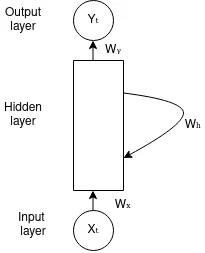


Source: https://medium.com/@poudelsushmita878/recurrent-neural-network-rnn-architecture-explained-1d69560541ef

You can see how $a[1]$ calculations include x as expected but also input the previous $a[0]$ in order to consider information from the past input as well and each $a[i]$ will keep having information of all previous inputs like this by including the last '$a$' value in its calculations.

## Backward Propagation

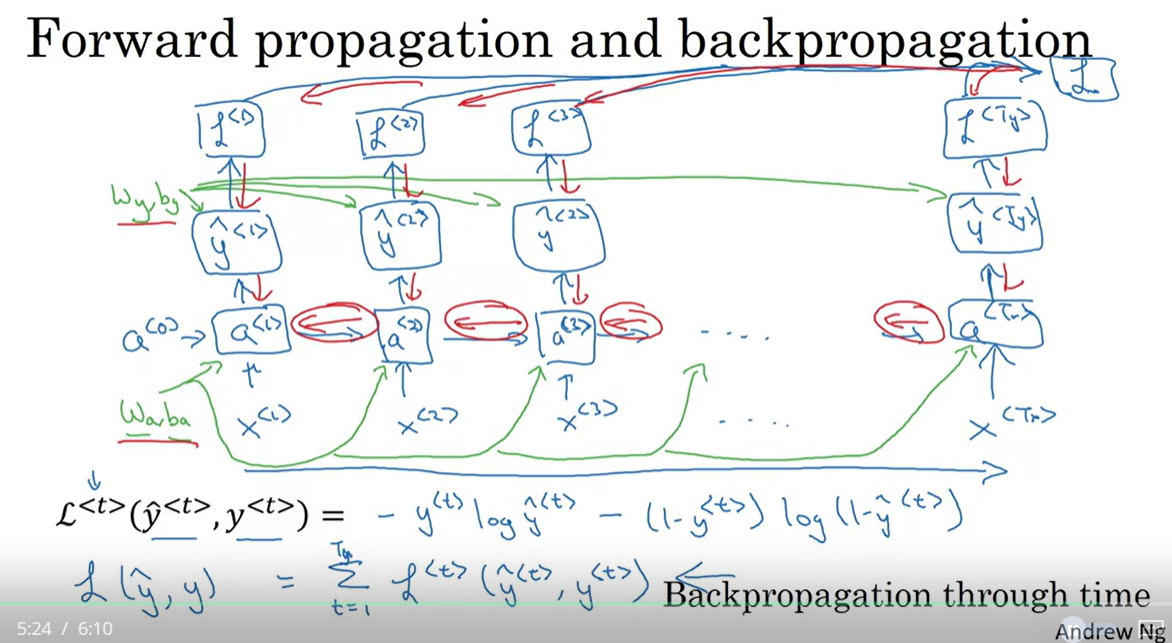

Here's another representation of the above

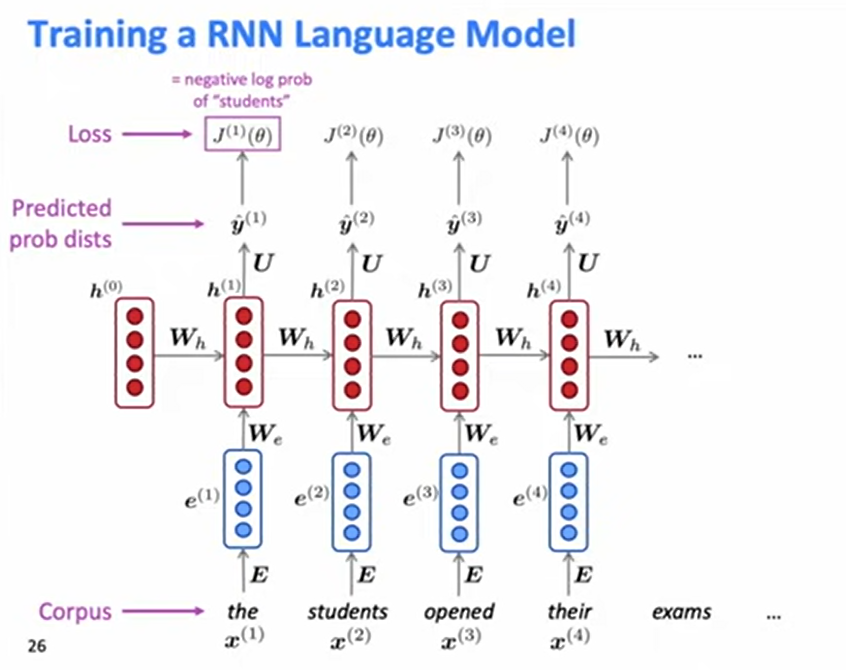

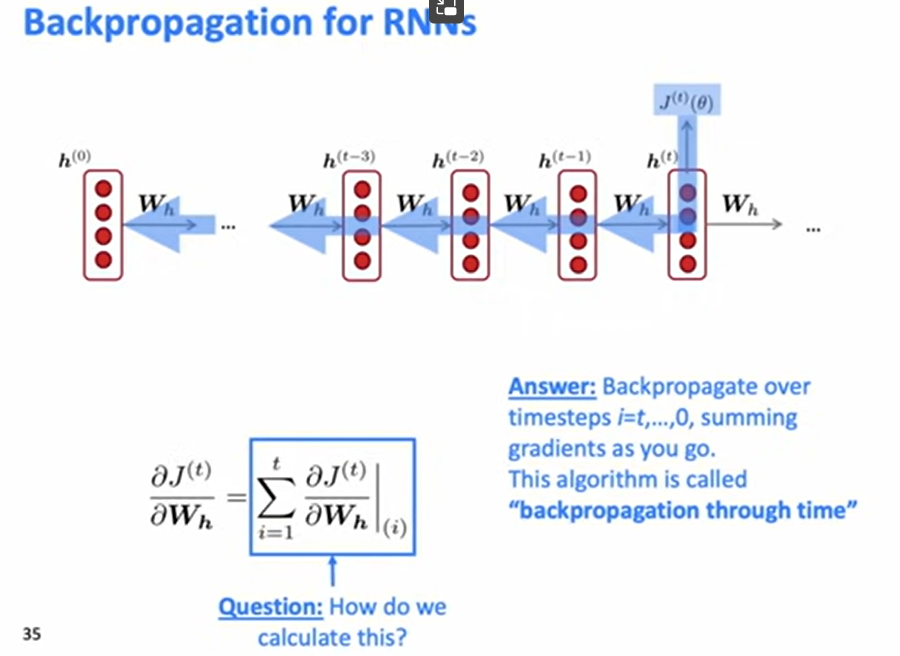

Source: https://www.youtube.com/watch?v=iWea12EAu6U&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=8

Here's an example of the calculations involved in the backpropagation through time for RNN model.


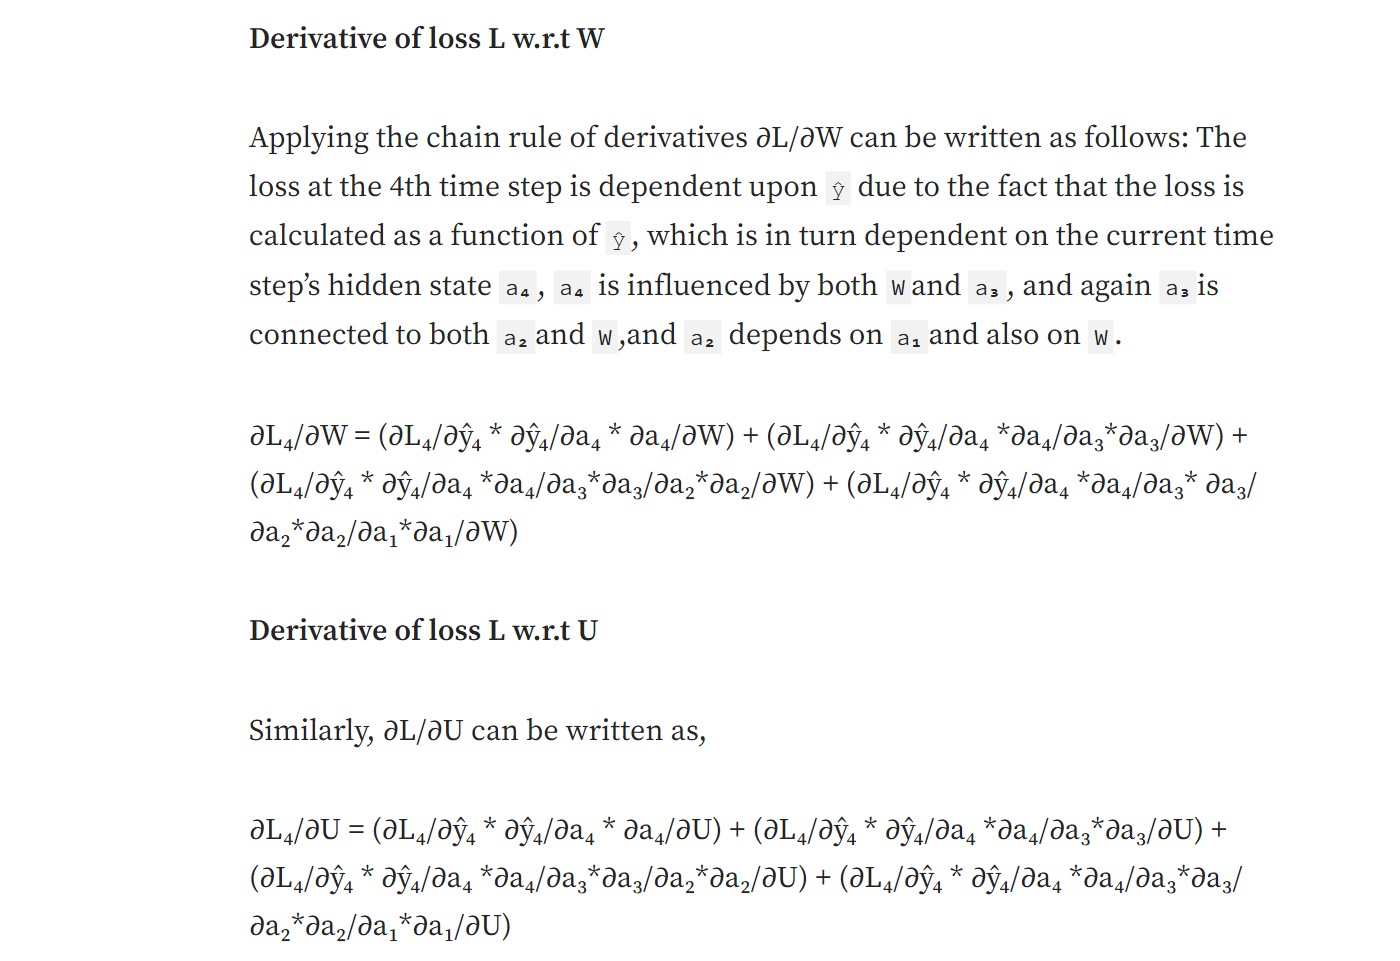

Source: https://medium.com/@poudelsushmita878/recurrent-neural-network-rnn-architecture-explained-1d69560541ef

Here are the equations again
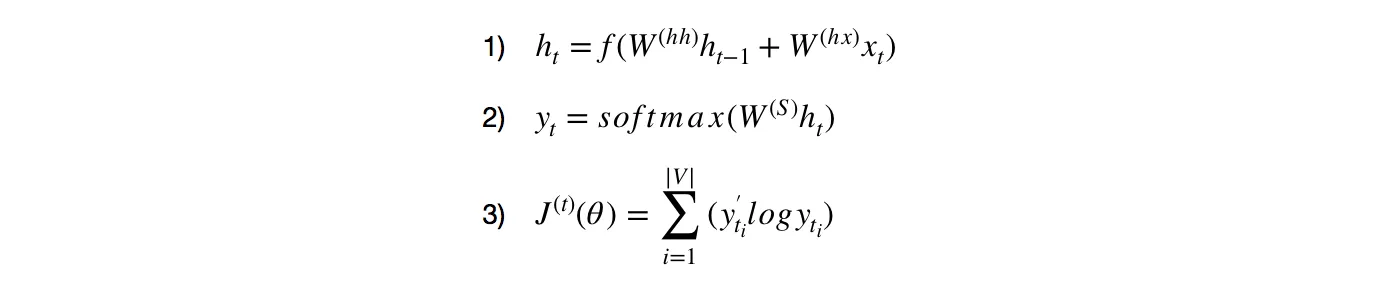

Source: https://towardsdatascience.com/learn-how-recurrent-neural-networks-work-84e975feaaf7

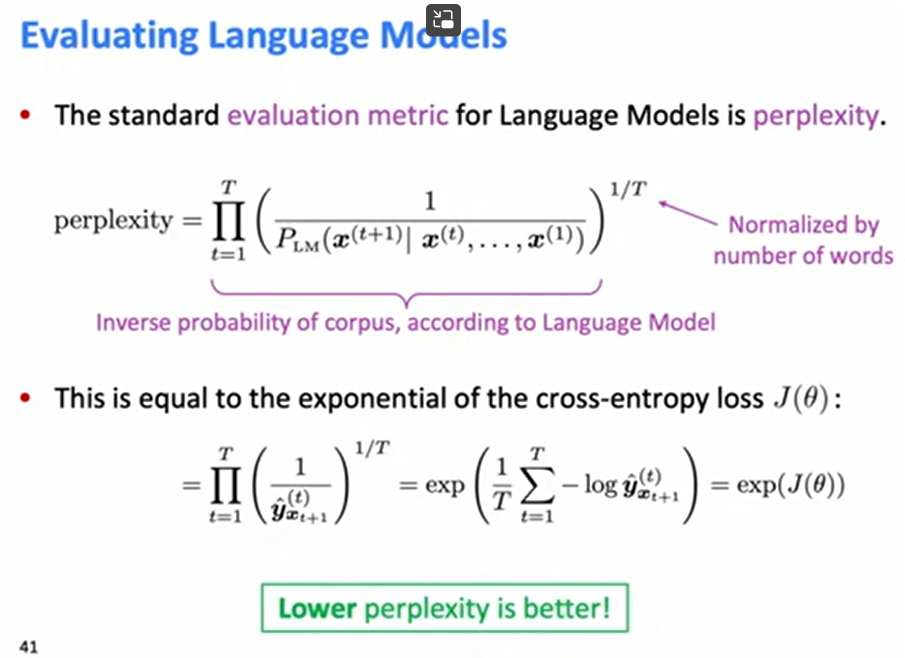

Using perplexity in evaluation of a language model makes sense as perplexity and the cross entropy function are connected through the above transformation and when optimizing the loss function, perplexity would also get optimized or minimized as we want it here.

### So RNNs are quite powerful as a way to represent sequence of text for further computation.

One other interesting usecase with RNNs as they have the ability to represent sequence of text well is getting a sentence level embedding.

The below representation shows how the hidden layer outputs can be used to represent a sentence (basically a sentence embedding) and that in-turn can be used to train another model to predict the sentiment depicted in the sentence. 

There are two ways of many possible ones:

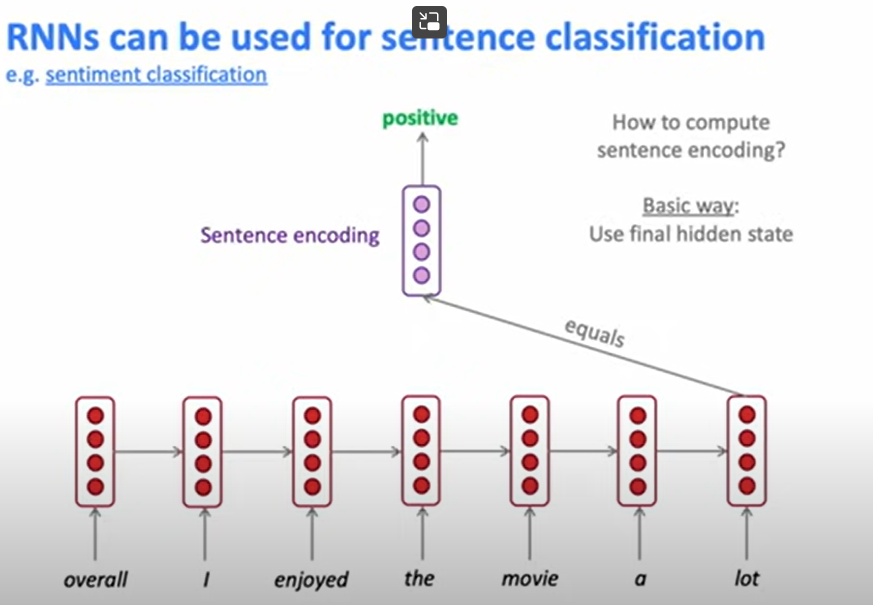


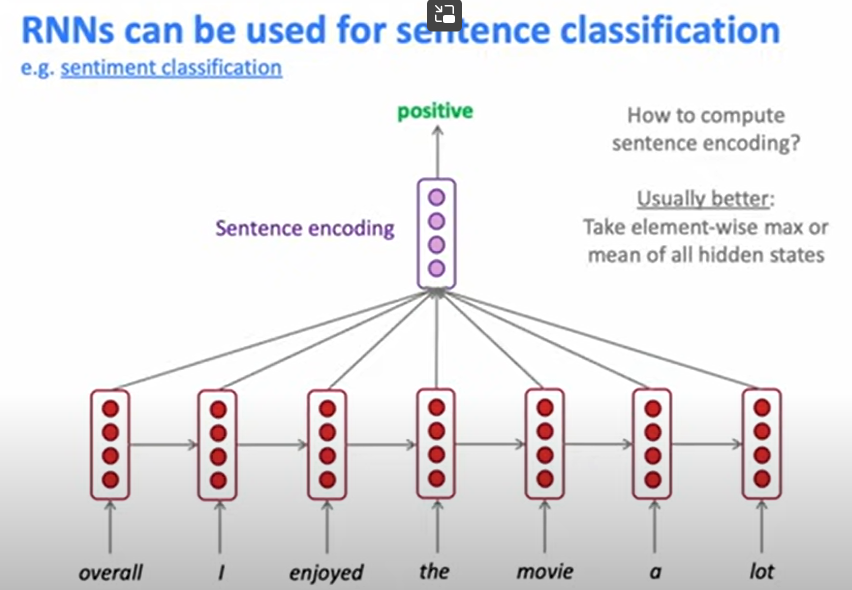

## Vanishing Gradient Problem

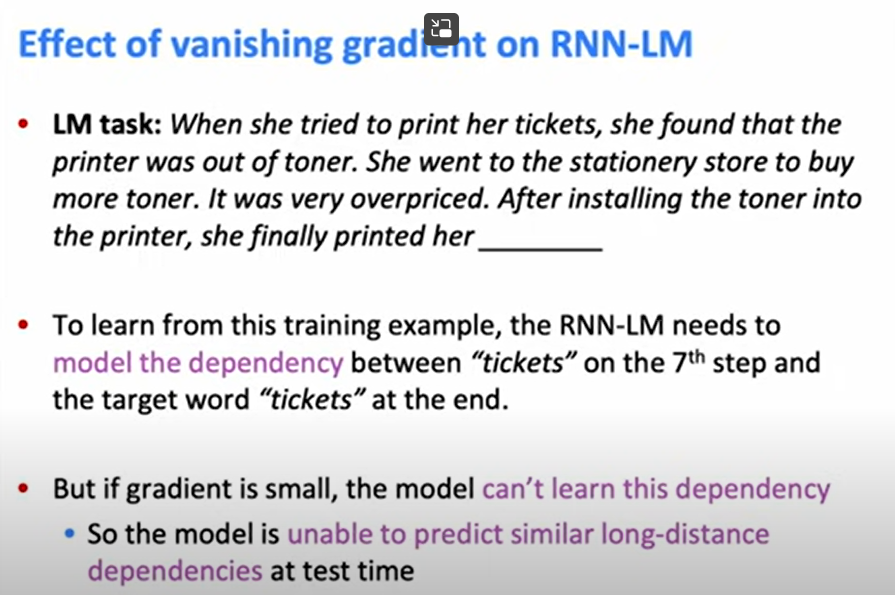

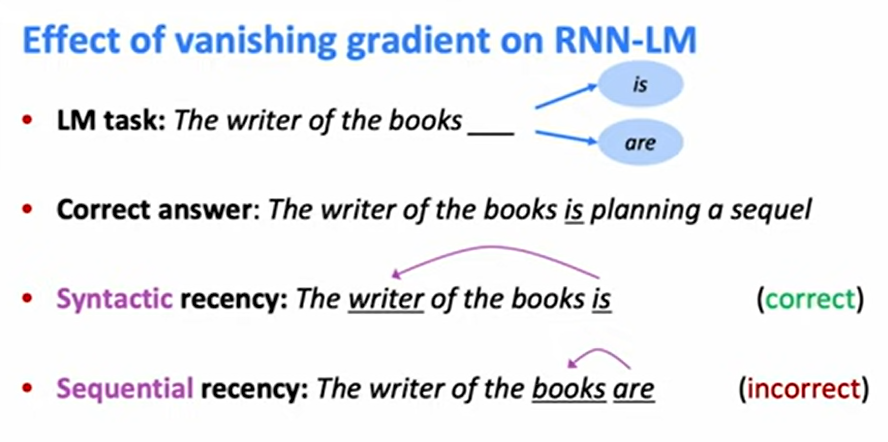

Due to vanishing gradients and how they affect the learning in RNNs, RNN language models are better at learning sequential recency and in evaluation can make this kind of error where they can predict based on sequential recency even though it's incorrect.

### Exploding Gradients Problem

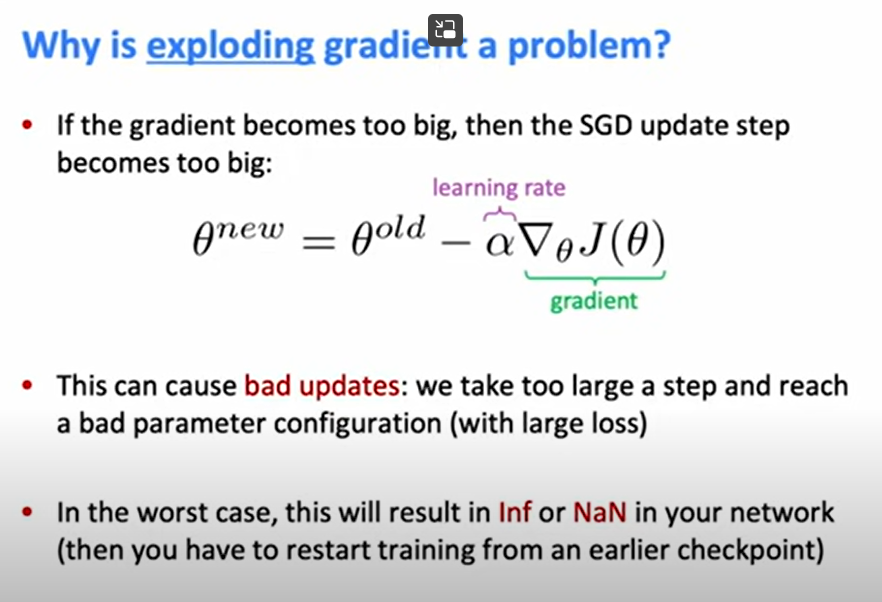

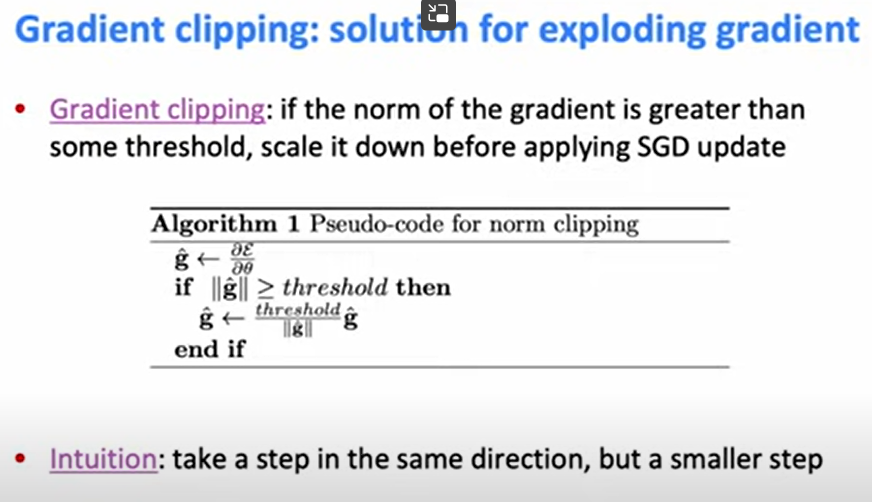

So RNNs are facing a memory problem. What if we do something about it? Well then we look at LSTMs and that would be in another notebook!

References: https://towardsdatascience.com/learn-how-recurrent-neural-networks-work-84e975feaaf7